In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [2]:
data=pd.read_csv('Trial_Joint_Angles.csv')
X = data.T.iloc[2:,4133:4259]
X

,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,...,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258
Neck right / left lateral bending (+/-),0.89,0.86,0.84,0.81,0.79,0.76,0.73,0.69,0.63,0.57,...,0.96,0.90,0.83,0.77,0.71,0.65,0.58,0.52,0.47,0.41
Neck right / left rotation (+/-),-12.92,-13.03,-13.15,-13.27,-13.39,-13.51,-13.64,-13.76,-13.89,-14.02,...,-3.89,-3.87,-3.85,-3.90,-3.87,-3.85,-3.82,-3.87,-3.93,-3.98
Neck flexion / extension (+/-),-26.58,-26.50,-26.42,-26.35,-26.29,-26.24,-26.21,-26.19,-26.19,-26.19,...,-23.65,-23.67,-23.70,-23.73,-23.76,-23.80,-23.84,-23.88,-23.93,-23.98
Back right / left lateral bending (+/-),2.62,2.54,2.46,2.40,2.35,2.31,2.29,2.28,2.26,2.21,...,3.32,3.30,3.27,3.24,3.21,3.18,3.14,3.08,3.01,2.94
Back right / left rotation (+/-),4.82,4.74,4.65,4.56,4.46,4.37,4.29,4.20,4.12,4.10,...,0.25,0.03,-0.17,-0.34,-0.48,-0.58,-0.67,-0.73,-0.78,-0.81
Back flexion / extension (+/-),-0.98,-0.95,-0.92,-0.87,-0.80,-0.74,-0.70,-0.70,-0.73,-0.73,...,-1.22,-1.19,-1.14,-1.09,-1.04,-1.00,-0.97,-0.92,-0.85,-0.76
Shoulder (L) abduction / adduction (+/-),7.21,7.16,7.08,6.97,6.85,6.74,6.65,6.58,6.53,6.51,...,6.76,6.75,6.75,6.77,6.80,6.83,6.86,6.88,6.92,6.96
Shoulder (L) internal / external rotation (+/-),7.83,7.68,7.52,7.36,7.19,7.02,6.86,6.71,6.59,6.51,...,11.62,11.80,11.97,12.12,12.05,11.95,12.01,12.04,12.05,12.04
Shoulder (L) flexion / extension (+/-),-7.87,-7.89,-7.88,-7.86,-7.83,-7.80,-7.77,-7.76,-7.76,-7.78,...,-7.05,-7.16,-7.26,-7.35,-7.45,-7.52,-7.59,-7.65,-7.70,-7.75
Shoulder (R) abduction / adduction (+/-),-0.34,-0.41,-0.46,-0.49,-0.49,-0.48,-0.46,-0.43,-0.41,-0.40,...,-0.61,-0.66,-0.73,-0.80,-0.88,-0.97,-1.06,-1.13,-1.19,-1.23


In [ ]:
# constant value
X = np.full((5, 100), 20)


In [ ]:
# random value

X = np.random.rand(10, 100)  # Replace with your actual data

In [ ]:
# Sin value

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, 100)

# Create the matrix X with sinusoidal values
X = np.sin(time_points)

# Repeat the sine wave for each row
X = np.tile(X, (5, 1))

In [ ]:
# Create the X matrix with sinusoidal and linear values
num_rows = 2
num_columns = 100

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, num_columns)

# Create the first row with sinusoidal values
sin_values = np.sin(time_points)

# Create the second row with linearly increasing values
linear_values = np.linspace(0, 1, num_columns)

# Combine the rows to create the matrix X
X = np.vstack((sin_values, linear_values))

# print(X)


In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


window_size = 5
smoothed_data = pd.DataFrame(moving_average(X.iloc[4], window_size))

In [ ]:
start = 1000
end = 14000
plt.plot(X.iloc[4,start:end], label = 'raw')
#plt.plot(smoothed_data.loc[start:end], label = 'smooth')
plt.legend()

In [3]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)
s_ = np.diag(s)
Vh_ = Vh.conj().T
# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(U.T, X2), Vh_)@ np.linalg.inv(s_) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vh_), np.linalg.inv(s_)) @ eigenvectors
pd.DataFrame(DMD_modes)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.000057+0.000000j,0.004747-0.004615j,0.004747+0.004615j,-0.001045-0.000156j,-0.001045+0.000156j,-0.001253+0.001454j,-0.001253-0.001454j,0.000491+0.000000j,-0.000123+0.000395j,-0.000123-0.000395j,...,-0.001917+0.000000j,-0.011153+0.000000j,0.020828-0.007908j,0.020828+0.007908j,0.004818-0.016883j,0.004818+0.016883j,-0.011629-0.000940j,-0.011629+0.000940j,-0.001717-0.005262j,-0.001717+0.005262j
1,-0.000092+0.000000j,-0.002329-0.018978j,-0.002329+0.018978j,0.031116+0.007489j,0.031116-0.007489j,0.006331-0.033839j,0.006331+0.033839j,0.014743+0.000000j,0.010480+0.007492j,0.010480-0.007492j,...,-0.106253+0.000000j,0.121087+0.000000j,-0.044017-0.087240j,-0.044017+0.087240j,0.005346-0.011979j,0.005346+0.011979j,0.006767+0.031786j,0.006767-0.031786j,-0.014399-0.000586j,-0.014399+0.000586j
2,0.000037+0.000000j,0.005398-0.001359j,0.005398+0.001359j,0.001148+0.000569j,0.001148-0.000569j,-0.001565-0.003497j,-0.001565+0.003497j,0.000479+0.000000j,0.002927-0.000525j,0.002927+0.000525j,...,0.114242+0.000000j,0.193409+0.000000j,-0.003080+0.008447j,-0.003080-0.008447j,0.008462+0.013300j,0.008462-0.013300j,0.006972-0.043549j,0.006972+0.043549j,-0.011362+0.036763j,-0.011362-0.036763j
3,-0.000072+0.000000j,-0.022590+0.002751j,-0.022590-0.002751j,-0.000819+0.000263j,-0.000819-0.000263j,0.006369+0.007554j,0.006369-0.007554j,0.006491+0.000000j,-0.000107+0.001819j,-0.000107-0.001819j,...,-0.021689+0.000000j,-0.023280+0.000000j,0.026375-0.035229j,0.026375+0.035229j,-0.011695-0.007545j,-0.011695+0.007545j,-0.015442+0.021535j,-0.015442-0.021535j,-0.011950+0.004177j,-0.011950-0.004177j
4,-0.042026+0.000000j,0.040179+0.192055j,0.040179-0.192055j,0.024154+0.009444j,0.024154-0.009444j,0.024215+0.013052j,0.024215-0.013052j,0.071740+0.000000j,0.061683-0.039926j,0.061683+0.039926j,...,0.088827+0.000000j,-0.079243+0.000000j,0.111727+0.005370j,0.111727-0.005370j,-0.007652-0.002302j,-0.007652+0.002302j,-0.013673+0.041748j,-0.013673-0.041748j,0.042620+0.054852j,0.042620-0.054852j
5,0.003967+0.000000j,0.071458-0.045762j,0.071458+0.045762j,0.001165+0.006055j,0.001165-0.006055j,0.002994-0.045281j,0.002994+0.045281j,-0.007904+0.000000j,-0.006611-0.009353j,-0.006611+0.009353j,...,-0.005606+0.000000j,0.008747+0.000000j,0.011040-0.001093j,0.011040+0.001093j,-0.005268+0.005259j,-0.005268-0.005259j,-0.041888-0.010908j,-0.041888+0.010908j,0.033853+0.026059j,0.033853-0.026059j
6,-0.000147+0.000000j,0.004697-0.005494j,0.004697+0.005494j,-0.000876-0.001142j,-0.000876+0.001142j,-0.002846+0.002949j,-0.002846-0.002949j,0.004709+0.000000j,-0.003739+0.004259j,-0.003739-0.004259j,...,-0.058855+0.000000j,-0.052054+0.000000j,0.039956+0.003902j,0.039956-0.003902j,-0.026217-0.000586j,-0.026217+0.000586j,-0.006689-0.019811j,-0.006689+0.019811j,0.041924+0.004226j,0.041924-0.004226j
7,-0.000385+0.000000j,0.000448-0.000598j,0.000448+0.000598j,-0.008427-0.001098j,-0.008427+0.001098j,-0.001614+0.004378j,-0.001614-0.004378j,0.001712+0.000000j,0.003626-0.001198j,0.003626+0.001198j,...,-0.136367+0.000000j,-0.080610+0.000000j,0.095457+0.005699j,0.095457-0.005699j,0.033964-0.003410j,0.033964+0.003410j,-0.049887-0.035659j,-0.049887+0.035659j,-0.041646+0.011951j,-0.041646-0.011951j
8,-0.000011+0.000000j,-0.000458-0.003526j,-0.000458+0.003526j,-0.002159-0.000325j,-0.002159+0.000325j,-0.001555-0.002102j,-0.001555+0.002102j,0.001284+0.000000j,-0.000412-0.001047j,-0.000412+0.001047j,...,0.049574+0.000000j,0.037142+0.000000j,0.048361+0.005367j,0.048361-0.005367j,0.019274-0.016032j,0.019274+0.016032j,-0.003405-0.012848j,-0.003405+0.012848j,-0.007999-0.017617j,-0.007999+0.017617j
9,-0.000322+0.000000j,-0.006218+0.000150j,-0.006218-0.000150j,0.000965+0.001721j,0.000965-0.001721j,0.006551-0.001234j,0.006551+0.001234j,0.002114+0.000000j,0.003020+0.001781j,0.003020-0.001781j,...,0.024484+0.000000j,-0.027759+0.000000j,0.079571-0.008304j,0.079571+0.008304j,0.015700-0.014260j,0.015700+0.014260j,-0.022322+0.014679j,-0.022322-0.014679j,0.014735+0.044746j,0.014

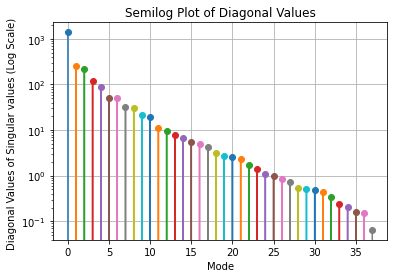

In [10]:
plt.semilogy(np.diag(s), marker='o', linestyle='-', markersize=6)
plt.xlabel('Mode')
plt.ylabel('Diagonal Values of Singular values (Log Scale) ')
plt.title('Semilog Plot of Diagonal Values')
plt.grid()
plt.show()

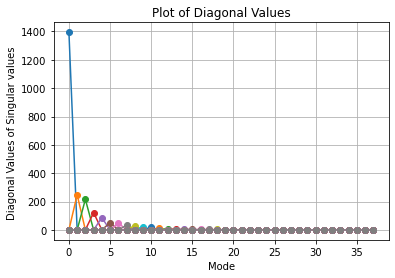

In [12]:
plt.plot(np.diag(s), marker='o', markersize=6)
plt.xlabel('Mode')
plt.ylabel('Diagonal Values of Singular values ')
plt.title('Plot of Diagonal Values')
plt.grid()
plt.show()

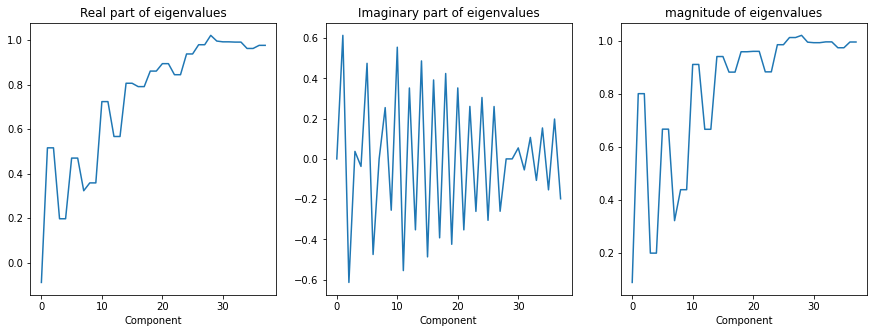

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot real parts of Eigenvalues
axes[0].plot(np.real(eigenvalues))
axes[0].set_xlabel('Component')
#axes[0].set_ylabel('Values')
axes[0].set_title('Real part of eigenvalues')

# Plot imaginary parts of Eigenvalues
axes[1].plot(np.imag(eigenvalues))
axes[1].set_xlabel('Component')
#axes[1].set_ylabel('Values')
axes[1].set_title('Imaginary part of eigenvalues')

# Plot magnitude of Eigenvalues

axes[2].plot(np.abs(eigenvalues))
axes[2].set_xlabel('Component')
#axes[2].set_ylabel('Values')
axes[2].set_title('magnitude of eigenvalues')

plt.show()

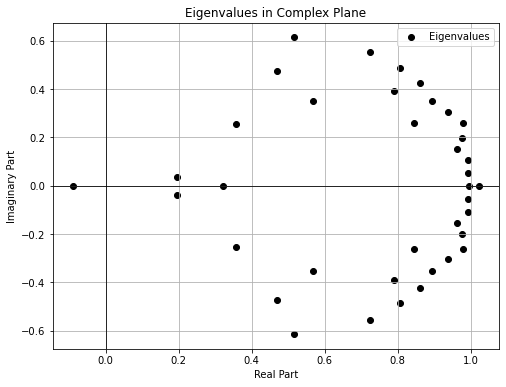

In [7]:

# Step 1: Sort eigenvalues by magnitude in descending order
sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Step 2: Plot eigenvalues in the complex plane
plt.figure(figsize=(8, 6))
plt.scatter(np.real(sorted_eigenvalues), np.imag(sorted_eigenvalues), c='black', marker='o', label='Eigenvalues')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in Complex Plane')
plt.grid()
plt.legend()

# Step 3: Observe the plot to identify dominant modes
# You might see clusters or patterns that indicate dominant modes

plt.show()


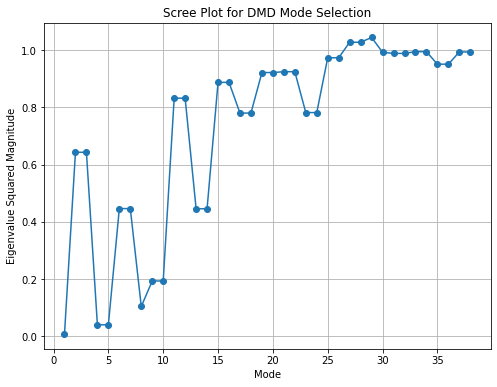

In [9]:
# Calculate the squared magnitudes of the eigenvalues
squared_magnitudes = np.abs(eigenvalues) ** 2

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(squared_magnitudes) + 1), squared_magnitudes, marker='o')
plt.xlabel('Mode')
plt.ylabel('Eigenvalue Squared Magnitude')
plt.title('Scree Plot for DMD Mode Selection')
plt.grid()

# Identify the "elbow point" (where the eigenvalues level off)
# You might need to manually inspect the plot to determine the point

plt.show()

In [4]:
# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)

# Truncate the SVD matrices to reduce dimensions
rank = 11  # Choose the rank based on desired dimensions
Ur = U[:, :rank]
Sr = np.diag(s)[:rank, :rank]
Vhr = Vh.conj().T[:, :rank]

# Approximate the A matrix using DMD formula
Atilde_r = np.dot(np.dot(Ur.T, X2), Vhr) @ np.linalg.inv(Sr)

# Compute eigenvalues and eigenvectors of Atilde
W_r, D_r = np.linalg.eig(Atilde_r)

# Compute DMD modes
Phi_r = np.dot(np.dot(X2, Vhr), np.linalg.inv(Sr)) @ D_r

# Calculate lambda and omega
lambda_r = np.diag(D_r)
omega = np.log(lambda_r).reshape(-1,1) 

# Compute DMD mode amplitudes
x1 = X.iloc[:, 0].to_numpy().reshape(-1, 1)  # Convert to 2D array
b = np.linalg.lstsq(Phi_r, x1, rcond=None)[0]

# DMD reconstructions

m = X1.shape[1]
time_dynamics = np.zeros((rank, m))
t = np.arange(m)
for i in range(m):
      time_dynamics[:, i] = (b* np.exp(omega * t[i])).flatten()
#X_dmd[:, t] = np.dot(np.diag(np.power(eigenvalues, t)), b)
Xdmd = np.dot(Phi_r, time_dynamics)


C:\Users\hodan\AppData\Local\Temp\ipykernel_5984\1856956302.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:, i] = (b* np.exp(omega * t[i])).flatten()


In [114]:
time_dynamics[:,3]

array([ 1.02785178e-02,  3.43454185e-04, -4.65426899e-04, -4.39542313e-03,
        1.10497619e-04,  5.22401973e-01,  4.16757040e-04, -4.70610289e-04,
       -1.66005654e-03,  5.73033155e-04, -4.89993405e-05, -1.56342712e-03,
        2.72212909e-03, -1.77103517e-05, -3.12021087e-06,  7.57535286e-05,
        9.21131550e-04, -7.74300627e-06,  1.76763343e-03,  3.89458393e-06,
       -4.14795538e-05,  1.35349180e-04, -3.20156741e-04, -6.74975299e-06,
        1.47588731e-05,  4.26041119e-04,  1.45525256e-04, -3.39824880e-08,
        1.61160599e-04,  3.94039977e-07,  1.64605455e-06, -6.99216801e-09,
       -6.64753260e-06,  7.02326928e-05,  6.73173747e-06, -4.75426287e-06,
       -7.97935947e-06])

C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


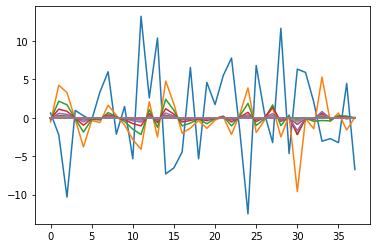

In [116]:
plt.plot(Xdmd)
plt.show()

C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


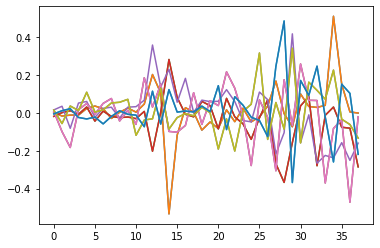

In [9]:
plt.plot(Phi_r)
plt.show()

In [6]:
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes_r.shape[1]):
    plt.plot(np.abs(DMD_modes_r[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()


NameError: name 'DMD_modes_r' is not defined

<Figure size 720x432 with 0 Axes>

In [92]:
# Step 1: Select the desired number of dominant modes
num_modes = 9  # Replace with your desired number of modes
selected_modes = Vh[:, :num_modes]

# Step 2: Reconstruct the modes
reconstructed_modes = np.dot(np.dot(X2, selected_modes), np.linalg.inv(s))

# Step 3: Reconstruct the dynamic evolution of modes over time
timesteps = 14000  # Number of time steps
X_dmd = np.zeros((num_modes, timesteps), dtype=complex)
b = np.linalg.lstsq(reconstructed_modes, X1[:, 0], rcond=None)[0]
for t in range(timesteps):
    X_dmd[:, t] = np.dot(np.diag(np.power(eigenvalues, t)), b)

# Print reconstructed modes and dynamic evolution
print("Reconstructed Modes:\n", reconstructed_modes)
print("\nReconstructed Dynamic Evolution:\n", X_dmd)

ValueError: shapes (38,15798) and (38,9) not aligned: 15798 (dim 1) != 38 (dim 0)

C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


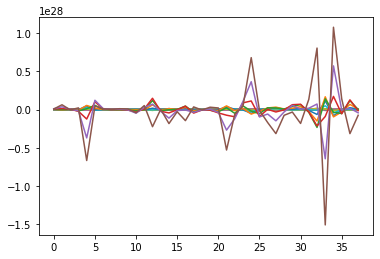

In [7]:

# Choose the number of modes to retain
num_modes_retained = 9  # Replace with your chosen number of modes

# Select the retained modes and eigenvalues
selected_modes = DMD_modes[:, :num_modes_retained]
selected_eigenvalues = eigenvalues[:num_modes_retained]

num_features, num_time_steps = X.shape
# Generate time steps based on the number of columns
start_time = 0
end_time = num_time_steps # Adjust as needed
time_steps = np.linspace(start_time, end_time, num_time_steps)


# Create the reconstructed data
reconstructed_data = np.zeros((num_features, num_time_steps), dtype=complex)

for i in range(num_modes_retained):
    mode_contribution = np.outer(selected_modes[:, i], np.exp(selected_eigenvalues[i] * time_steps))
    reconstructed_data += mode_contribution

# Print the reconstructed data
plt.plot(reconstructed_data)


C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


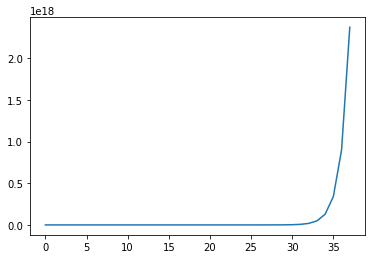

In [106]:
import numpy as np
from scipy.linalg import svd


# Make predictions using DMD modes
initial_state = X1.iloc[:, -1]
predicted_states = []
for i in range(len(X1)):
    predicted_state = np.dot(np.exp(eigenvalues * i), DMD_modes.T) @ initial_state
    predicted_states.append(predicted_state)

predicted_states = np.array(predicted_states)

# Print the predicted states
plt.plot(predicted_states)


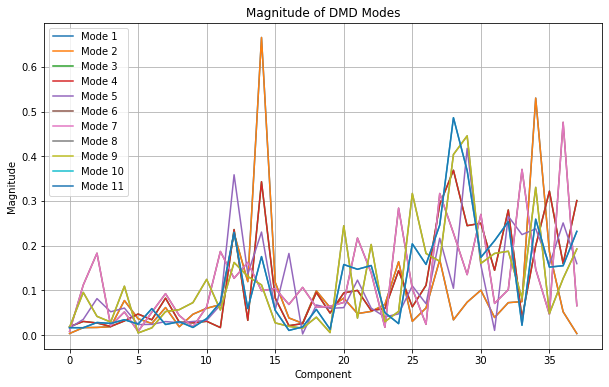

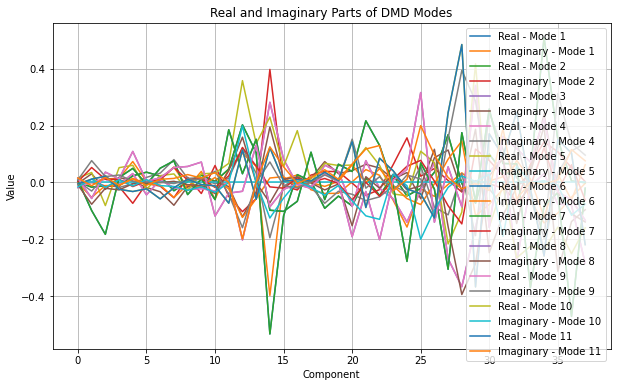

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have DMD_modes defined previously
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(Phi_r.shape[1]):
    plt.plot(np.abs(Phi_r[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()

# Plot real and imaginary parts of DMD modes
plt.figure(figsize=(10, 6))
for i in range(Phi_r.shape[1]):
    plt.plot(np.real(Phi_r[:, i]), label=f'Real - Mode {i + 1}')
    plt.plot(np.imag(Phi_r[:, i]), label=f'Imaginary - Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('Real and Imaginary Parts of DMD Modes')
plt.legend()
plt.grid()
plt.show()
